# solution for tables 
#### Gourav Khurana 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
#read file as data frame 
df=pd.read_excel("D:/Py Programs/FreeLancer/tables.xlsx")

In [3]:
df.head()

,reference,flyash,ggbs,CA,Fine aggregate,NaOH,Na2SiO3,Added water,superplasticizer,alkaline ratio,molarity,timecure,temp cure,3day,7day,28day
0,1,360.0,40.0,1209.0,651.0,45.7,114.3,0.0,0.0,CR,CM,A,a,16.615385,27.0,40.0
1,1,320.0,80.0,1209.0,651.0,45.7,114.3,0.0,0.0,CR,CM,A,a,19.076923,31.0,47.0
2,1,360.0,40.0,1209.0,651.0,64.0,96.0,0.0,0.0,BR,CM,A,a,15.384615,25.0,43.0
3,1,320.0,80.0,1209.0,651.0,64.0,96.0,0.0,0.0,BR,CM,A,a,17.846154,29.0,54.0
4,1,400.0,0.0,1209.0,658.0,40.0,100.0,0.0,6.0,CR,CM,A,a,6.769231,11.0,25.0


In [5]:
#check for datatypes 
df.dtypes
#there are four categorical var alkaline ratio ,molarity ,timecure,temp cure...rest all are continous 

reference             int64
flyash              float64
ggbs                float64
CA                  float64
Fine aggregate      float64
NaOH                float64
Na2SiO3             float64
Added water         float64
superplasticizer    float64
alkaline ratio       object
molarity             object
timecure             object
temp cure            object
3day                float64
7day                float64
28day               float64
dtype: object

In [6]:
#check for mssing values 
df.isnull().sum() 
#no missing vlues 

reference           0
flyash              0
ggbs                0
CA                  0
Fine aggregate      0
NaOH                0
Na2SiO3             0
Added water         0
superplasticizer    0
alkaline ratio      0
molarity            0
timecure            0
temp cure           0
3day                0
7day                0
28day               0
dtype: int64

In [8]:
#shape of df 
df.shape

(376, 16)

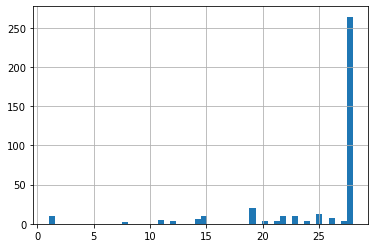

In [10]:
#univariate analysis for 
df['reference'].hist(bins=50)

In [11]:
df['reference'].mode() #we can see 28 is most repeated

0    28
dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0xda743d0>,
 0    CR
 dtype: object)

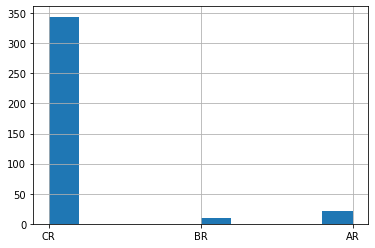

In [13]:
#Univariate analysis of alkaline raio(categorical vvariable) 
df['alkaline ratio'].hist(),df['alkaline ratio'].mode()

(0    BM
 dtype: object,
 <matplotlib.axes._subplots.AxesSubplot at 0xdbd2ab0>)

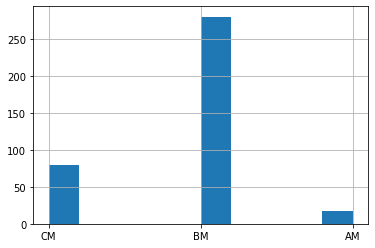

In [19]:
df['molarity'].mode(),df['molarity'].hist()
#Bm is used mosst frequentlty as moalrity

A    202
D    153
B      8
E      7
C      6
Name: timecure, dtype: int64

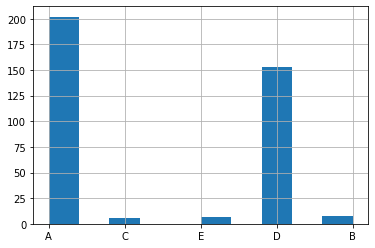

In [22]:
df['timecure'].mode(),df['timecure'].hist()
df['timecure'].value_counts()

(a    206
 d    144
 b     10
 h      8
 e      6
 f      2
 Name: temp cure, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0xf1c0d30>)

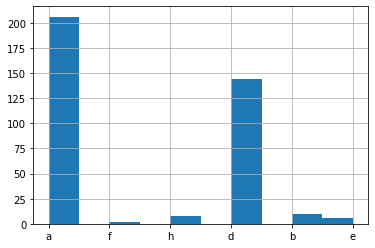

In [24]:
df['temp cure'].value_counts(),df['temp cure'].hist()
#mode is a 

# Model prediction 

In [46]:
import sklearn
#we font have any categorical var so no need to use dummies 

In [47]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

we will use ensemble model Random forest to predict

In [48]:
#since there are categorical variables we will be using get dummiess to convert it into dummies
df=pd.get_dummies(df)
df.head()

,reference,flyash,ggbs,CA,Fine aggregate,NaOH,Na2SiO3,Added water,superplasticizer,3day,...,timecure_B,timecure_C,timecure_D,timecure_E,temp cure_a,temp cure_b,temp cure_d,temp cure_e,temp cure_f,temp cure_h
0,1,360.0,40.0,1209.0,651.0,45.7,114.3,0.0,0.0,16.615385,...,0,0,0,0,1,0,0,0,0,0
1,1,320.0,80.0,1209.0,651.0,45.7,114.3,0.0,0.0,19.076923,...,0,0,0,0,1,0,0,0,0,0
2,1,360.0,40.0,1209.0,651.0,64.0,96.0,0.0,0.0,15.384615,...,0,0,0,0,1,0,0,0,0,0
3,1,320.0,80.0,1209.0,651.0,64.0,96.0,0.0,0.0,17.846154,...,0,0,0,0,1,0,0,0,0,0
4,1,400.0,0.0,1209.0,658.0,40.0,100.0,0.0,6.0,6.769231,...,0,0,0,0,1,0,0,0,0,0


In [49]:
df.dtypes

reference              int64
flyash               float64
ggbs                 float64
CA                   float64
Fine aggregate       float64
NaOH                 float64
Na2SiO3              float64
Added water          float64
superplasticizer     float64
3day                 float64
7day                 float64
28day                float64
alkaline ratio_AR      uint8
alkaline ratio_BR      uint8
alkaline ratio_CR      uint8
molarity_AM            uint8
molarity_BM            uint8
molarity_CM            uint8
timecure_A             uint8
timecure_B             uint8
timecure_C             uint8
timecure_D             uint8
timecure_E             uint8
temp cure_a            uint8
temp cure_b            uint8
temp cure_d            uint8
temp cure_e            uint8
temp cure_f            uint8
temp cure_h            uint8
dtype: object

So we can see that all the categorical variables are now dummies either 0 or 1 and they dont have much values so we won't get too many features 

In [50]:
x=df.drop(['28day','7day','3day'],axis=1)
y1=df['3day']
y2=df['7day']
y3=df['28day']

#### predict 3day 

In [51]:
mms.fit_transform(x,y1)

array([[0.        , 0.69998056, 0.07389618, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.62220494, 0.14779235, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.69998056, 0.07389618, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.41804394, 0.39719195, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.4277659 , 0.40642897, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43748785, 0.41566599, ..., 0.        , 0.        ,
        0.        ]])

In [56]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=45)

In [57]:
from sklearn.ensemble import RandomForestRegressor 


In [109]:
rfr=RandomForestRegressor(max_depth=10,min_samples_split=2)
rfr.fit(train_x,train_y1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [110]:
from sklearn.metrics import r2_score
pred_train = rfr.predict(train_x)
train_score = r2_score(train_y1,pred_train)
pred_test = rfr.predict(test_x)
valid_score1=r2_score(test_y1,pred_test)
print('Train score for 3day:',train_score),print("test score for 3day:",valid_score1)

Train score for 3day: 0.9618196824458004
test score for 3day: 0.7901235026224893


(None, None)

### Better the r-squared better the model so validation score or test score is quite good for 3day

In [111]:


#mean sqare log eror 
from sklearn.metrics import mean_squared_log_error
pred_train = rfr.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y1,pred_train))

pred_test = rfr.predict(test_x)
valid_score4=np.sqrt(mean_squared_log_error(test_y1,pred_test))

print('Training score:', train_score)
print('Test score:', valid_score4)

Training score: 0.10683839413291377
Test score: 0.17939844284246


### lower the value of msle better the model

## predict 7day

In [112]:
mms.fit_transform(x,y2)

from sklearn.model_selection import train_test_split
train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=45)

rfr=RandomForestRegressor(max_depth=10,min_samples_split=2)
rfr.fit(train_x,train_y2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
#r -squared
pred_train = rfr.predict(train_x)
train_score = r2_score(train_y2,pred_train)
pred_test = rfr.predict(test_x)
valid_score2=r2_score(test_y2,pred_test)
print('Train score for 7day:',train_score),print("test score for 7day:",valid_score2)

Train score for 7day: 0.9651396582298555
test score for 7day: 0.8150774053522405


(None, None)

#### Better the r2_score  better model

In [114]:
from sklearn.metrics import mean_squared_log_error
pred_train = rfr.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y2,pred_train))

pred_test = rfr.predict(test_x)
valid_score5=np.sqrt(mean_squared_log_error(test_y2,pred_test))

print('Training score for 7day:', train_score)
print('Test score for 7 day:', valid_score5)

Training score for 7day: 0.09735596574385603
Test score for 7 day: 0.15848588998995836


#### lesser the msle score better the model

# Predict for 28 day

In [115]:
mms.fit_transform(x,y3)

from sklearn.model_selection import train_test_split
train_x,test_x,train_y3,test_y3=train_test_split(x,y3,random_state=45)

rfr=RandomForestRegressor(max_depth=10,min_samples_split=2)
rfr.fit(train_x,train_y3)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [116]:
#r -squared
pred_train = rfr.predict(train_x)
train_score = r2_score(train_y3,pred_train)
pred_test = rfr.predict(test_x)
valid_score3=r2_score(test_y3,pred_test)
print('Train score for 28day:',train_score),print("test score for 28day:",valid_score3)

Train score for 28day: 0.9758958121785308
test score for 28day: 0.8419466741970201


(None, None)

#### Better r2 scoree better model 

In [117]:
from sklearn.metrics import mean_squared_log_error
pred_train = rfr.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y3,pred_train))

pred_test = rfr.predict(test_x)
valid_score6=np.sqrt(mean_squared_log_error(test_y3,pred_test))

print('Training score for 28 day:', train_score)
print('Test score for 28 day:', valid_score6)

Training score for 28 day: 0.09271940625227267
Test score for 28 day: 0.14514758157372637


#### Lower msle better model

## lets comapre the score for 3day ,7day,  28day prediction r2_score

In [118]:
value=[valid_score1,valid_score2,valid_score3]
name=['3day','7day','28day']

In [119]:
df2=pd.DataFrame(index=name,data=value)


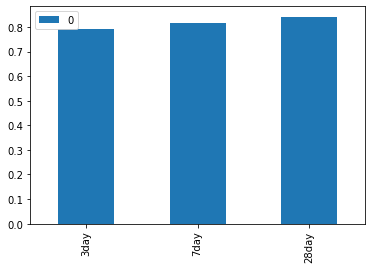

In [120]:
df2.plot(kind='bar')


# lets check which has lower MSLE score among these test score 

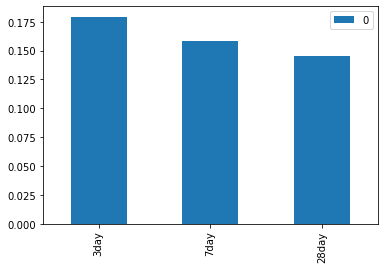

In [121]:
value=[valid_score4,valid_score5,valid_score6]
name=['3day','7day','28day']
df3=pd.DataFrame(index=name,data=value)
df3.plot(kind='bar')

### Here we can see the values of 28day target var is predicted better over 3day and 7day. As we can see there is low Mean squared relative error and high R2_score 